In [1]:
# Import libraries
import numpy as np
import pandas as pd
import glob
import tensorflow as tf
import os
import pickle

In [2]:
# Mount Google Drive for accessing files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow


In [ ]:
!pip install librosa

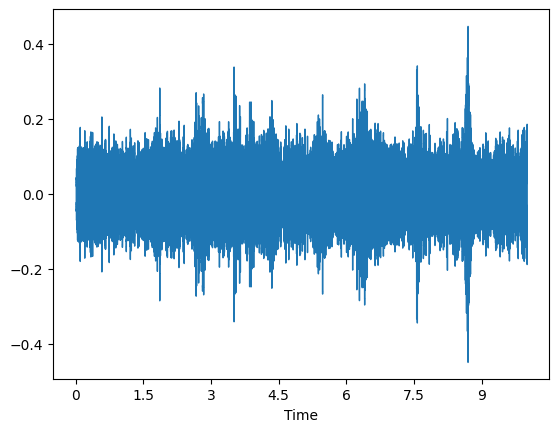

In [3]:
# Load audio file and display waveform
import IPython.display as ipd
import librosa, librosa.display
import matplotlib.pyplot
data,frame=librosa.load(r"/content/drive/MyDrive/ML_Jcomp/train/normal_id_01_00000000.wav")
librosa.display.waveshow(data,sr=frame)
ipd.Audio(r"/content/drive/MyDrive/ML_Jcomp/train/normal_id_01_00000000.wav")

In [4]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=data, sr=frame, n_mfcc=40)
print(mfccs)

[[-271.99826   -242.616     -241.84367   ... -227.0608    -227.5725
  -210.81384  ]
 [ 150.61934    166.01355    167.12048   ...  176.90048    174.8764
   158.04883  ]
 [ -21.796434   -28.467808   -29.626339  ...  -24.91362    -26.840696
   -15.736618 ]
 ...
 [  14.699332    15.222509    13.22249   ...    7.3860817    6.1196423
     6.379387 ]
 [  -3.8782244   -2.0707674   -4.175333  ...   -7.9836564   -9.035469
    -7.134364 ]
 [  -5.8033624   -6.1866155   -4.5806975 ...   -0.6591021    0.8754142
    -2.2474089]]


In [5]:
!pip install AudioPy-ML

In [6]:
# Extract features using AudioPy-ML library
from Audiopy_ML import autoaudio
audio_dataset_path=glob.glob(r"/content/drive/MyDrive/ML_Jcomp/train/*.wav")
df=autoaudio.AutomatedExtractor_multiple(audio_dataset_path)

In [7]:
# Save the extracted features to a file
output_folder = "/content/drive/MyDrive"  # Specify the folder where you want to save the file
output_file_path = os.path.join(output_folder, "df_output.pkl")  # Complete file path
with open(output_file_path, 'wb') as output_file:
    pickle.dump(df, output_file)

In [8]:
# Load the saved features
import pickle
input_file_path = "/content/drive/MyDrive/df_output.pkl"
with open(input_file_path, 'rb') as input_file:
    df = pickle.load(input_file)


In [9]:
# Extract features for test audio using AudioPy-ML library
audio_dataset_path=glob.glob(r"/content/drive/MyDrive/ML_Jcomp/test/*.wav")
test_audio=autoaudio.AutomatedExtractor_multiple(audio_dataset_path)

In [10]:
# Save the extracted test features to a file
output_folder = "/content/drive/MyDrive"  # Specify the folder where you want to save the file
output_file_path = os.path.join(output_folder, "test_audio_output.pkl")  # Complete file path
with open(output_file_path, 'wb') as output_file:
    pickle.dump(test_audio, output_file)

In [11]:
# Load the saved test features
input_file_path = "/content/drive/MyDrive/test_audio_output.pkl"
with open(input_file_path, 'rb') as input_file:
    test_audio= pickle.load(input_file)


In [12]:
df.shape

(3000, 7)

In [13]:
test_audio.shape

(3518, 7)

In [14]:
# Perform data preprocessing and scaling
df = df.applymap(lambda x: np.median(x))
test_data = test_audio.applymap(lambda x: np.median(x))
print(df.shape,test_data.shape)

(3000, 7) (3518, 7)


In [15]:
# Convert data to numpy arrays
x=np.array(df).tolist()
x=np.array(x)
x_t=np.array(test_data).tolist()
x_t=np.array(x_t)

In [16]:
x.shape,x_t.shape

((3000, 7), (3518, 7))

In [17]:
# Normalize and standardize the data
from sklearn.preprocessing import StandardScaler, Normalizer
x=Normalizer().fit_transform(x)
x_t=Normalizer().fit_transform(x_t)
x=StandardScaler().fit_transform(x)
x_t=StandardScaler().fit_transform(x_t)

In [18]:
# Plot the autoencoder model architecture
from keras import Sequential
from keras.layers import *
autoencoder=Sequential()
autoencoder.add(Dense(64,activation='elu',input_shape=([7])))
autoencoder.add(Dense(32,activation='elu'))
autoencoder.add(Dense(16,activation='elu'))
autoencoder.add(Dense(8,activation='elu'))
autoencoder.add(Dense(4,activation='elu'))
autoencoder.add(Dense(8,activation='elu'))
autoencoder.add(Dense(16,activation='elu'))
autoencoder.add(Dense(32,activation='elu'))
autoencoder.add(Dense(64,activation='elu'))
autoencoder.add(Dense(7,activation='elu'))

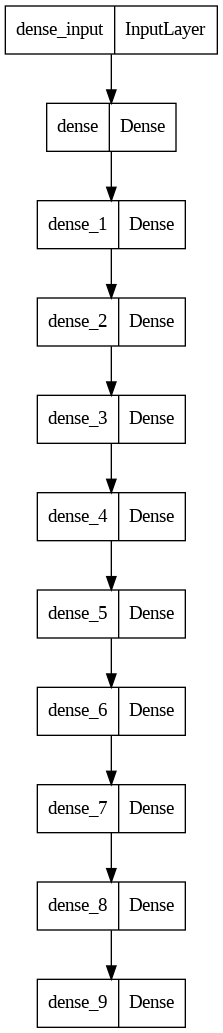

In [19]:
# Plot the autoencoder model architecture
from keras.utils import plot_model
plot_model(autoencoder)

In [20]:
# Set up a learning rate reduction callback
lrp=tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.05,patience=2)

# Compile and train the autoencoder model
autoencoder.compile('adam','mse',metrics=['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error'])
history=autoencoder.fit(x,x,epochs=100,validation_data=(x_t,x_t),verbose=1,callbacks=lrp)

Epoch 1/100
94/94 [==============================] - 4s 9ms/step - loss: 0.3354 - mean_squared_error: 0.3354 - mean_absolute_error: 0.4057 - mean_squared_logarithmic_error: 0.0414 - val_loss: 0.1825 - val_mean_squared_error: 0.1825 - val_mean_absolute_error: 0.3043 - val_mean_squared_logarithmic_error: 0.0169 - lr: 0.0010
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.1624 - mean_squared_error: 0.1624 - mean_absolute_error: 0.2730 - mean_squared_logarithmic_error: 0.0126 - val_loss: 0.1442 - val_mean_squared_error: 0.1442 - val_mean_absolute_error: 0.2553 - val_mean_squared_logarithmic_error: 0.0102 - lr: 0.0010
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.1420 - mean_squared_error: 0.1420 - mean_absolute_error: 0.2454 - mean_squared_logarithmic_error: 0.0094 - val_loss: 0.1351 - val_mean_squared_error: 0.1351 - val_mean_absolute_error: 0.2431 - val_mean_squared_logarithmic_error: 0.0092 - lr: 0.0010
Epoch 4/100
94/94 [=========

In [21]:
print(x_t)

[[ 0.59128621  1.16684423 -1.41852199 ... -1.00797073 -0.43670235
  -1.39079115]
 [-0.48944924 -0.51118566  3.06444248 ...  0.9974271   3.07527467
   2.98694419]
 [-0.12589957 -0.74314625  1.6055273  ...  0.96549195  0.8623493
   1.5111678 ]
 ...
 [ 1.08093224 -0.82692636  0.15410455 ...  0.79958164 -0.46113199
   0.25001216]
 [ 0.79209015 -0.17287296 -0.25456901 ... -0.0913564  -0.65254242
  -0.11662899]
 [ 1.33134834  1.38042686 -1.25239859 ... -1.4699954  -0.94728617
  -1.25847283]]


In [22]:
# Evaluate the autoencoder on training
autoencoder.evaluate(x,x)

94/94 [==============================] - 0s 2ms/step - loss: 0.0758 - mean_squared_error: 0.0758 - mean_absolute_error: 0.1244 - mean_squared_logarithmic_error: 8.5386e-04


[0.0758446678519249,
 0.0758446678519249,
 0.12435328960418701,
 0.0008538578986190259]

In [23]:
# Evaluate the autoencoder on validation data
autoencoder.evaluate(x_t,x_t)

110/110 [==============================] - 0s 2ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - mean_absolute_error: 0.1276 - mean_squared_logarithmic_error: 9.8837e-04


[0.0718914195895195,
 0.0718914195895195,
 0.12760679423809052,
 0.0009883652674034238]

94/94 [==============================] - 0s 3ms/step


(array([2.178e+03, 2.730e+02, 1.270e+02, 8.200e+01, 6.900e+01, 5.100e+01,
        3.500e+01, 2.900e+01, 2.300e+01, 8.000e+00, 1.400e+01, 5.000e+00,
        6.000e+00, 9.000e+00, 8.000e+00, 1.300e+01, 1.300e+01, 2.000e+00,
        8.000e+00, 9.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([4.29579628e-05, 4.34399608e-02, 8.68369636e-02, 1.30233966e-01,
        1.73630969e-01, 2.17027972e-01, 2.60424975e-01, 3.03821978e-01,
        3.47218981e-01, 3.90615983e-01, 4.34012986e-01, 4.77409989e-01,
        5.20806992e-01, 5.64203995e-01, 6.07600998e-01, 6.50998001e-01,
        6.94395003e-01, 7.37792006e-01, 7.81189009e-01, 8.24586012e-01,
        8.679830

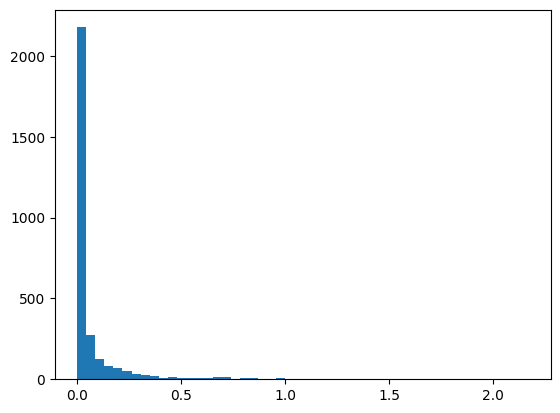

In [24]:
# Visualize the training loss histogram
import matplotlib.pyplot as plt
reconstruction = autoencoder.predict(x)
train_loss = tf.keras.losses.mse(reconstruction, x)
mse = np.mean(np.power(x - reconstruction, 2), axis=1)
plt.hist(train_loss, bins=50)

110/110 [==============================] - 0s 2ms/step


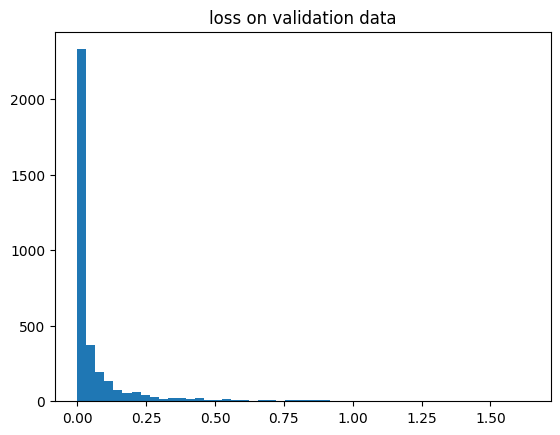

In [25]:
# Visualize the validation loss histogram
import matplotlib.pyplot as plt
reconstruction_a = autoencoder.predict(x_t)
train_loss_a = tf.keras.losses.mse(reconstruction_a, x_t)
mse_t = np.mean(np.power(x_t - reconstruction_a, 2), axis=1)
plt.hist(train_loss_a, bins=50)
plt.title("loss on validation data")
plt.show()

# Calculate the threshold for anomaly detection
threshold = np.percentile(train_loss_a,80)

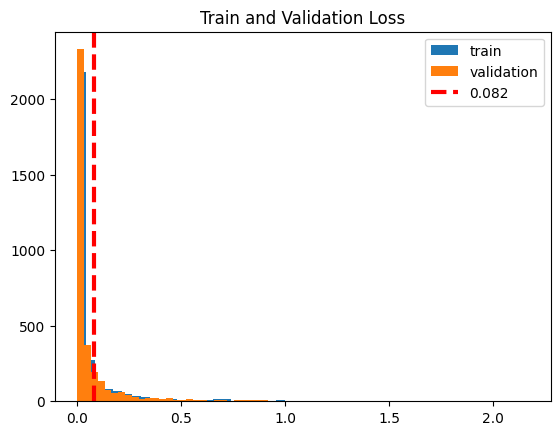

In [26]:
# Visualize the training and validation loss histograms with threshold
plt.hist(train_loss, bins=50, label='train')
plt.hist(train_loss_a, bins=50, label='validation')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Train and Validation Loss")
plt.show()

In [27]:
# Make predictions and create a dataset for anomaly detection
predictions=[]
loss=[]
for i in x_t:
    i=np.expand_dims(i,axis=0)
    out=autoencoder.predict(i)
    predictions.append(out)
    prediction_loss = tf.keras.losses.mae(out, i)
    loss.append(prediction_loss)

1/1 [==============================] - 0s 26ms/step


In [28]:
dataset=pd.DataFrame()
dataset['loss for predictions']=loss

In [29]:
# Generates predictions on the test set using the trained autoencoder.
# Creates a dataset with prediction losses for anomaly detection.
print(threshold)
a=[]
for i in dataset['loss for predictions']:
    if np.array(i)<threshold:
         a.append(0)
    else:
        a.append(1)
dataset['predicted status']=a
dataset = dataset.sort_values(by=dataset.columns[-1])
dataset.head()

0.0821002278658424


,loss for predictions,predicted status
2333,"(tf.Tensor(0.03216400351518327, shape=(), dtyp...",0
2909,"(tf.Tensor(0.07118723408600221, shape=(), dtyp...",0
2495,"(tf.Tensor(0.0547454201743754, shape=(), dtype...",0
2911,"(tf.Tensor(0.05581619551979812, shape=(), dtyp...",0
2494,"(tf.Tensor(0.07663191889293126, shape=(), dtyp...",0


In [30]:
dataset['predicted status'].value_counts()

1    1808
0    1710
Name: predicted status, dtype: int64

In [31]:
# Specify the desired output CSV file path
output_csv_path = "/content/drive/MyDrive/dataset_predictions.csv"  # Specify the desired output CSV file path
dataset.to_csv(output_csv_path, index=False)
print(f"Dataset saved to {output_csv_path}")

Dataset saved to /content/drive/MyDrive/dataset_predictions.csv


In [32]:
import os
import glob

audio_dataset_path = "/content/drive/MyDrive/ML_Jcomp/test/*.wav"

# Extracting true labels from filenames in the test folder
true_labels = []
file_paths = glob.glob(audio_dataset_path)
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    if 'anomaly' in file_name:
        true_labels.append(1)  # Anomaly label
    elif 'normal' in file_name:
        true_labels.append(0)  # Normal label

# Ensure the lengths match before assigning to the DataFrame
if len(true_labels) == len(dataset):
    dataset['true_labels'] = true_labels

    # Calculate accuracy
    correct_predictions = (dataset['predicted status'] == dataset['true_labels']).sum()
    total_predictions = len(dataset)
    accuracy = correct_predictions / total_predictions

    print(f"Accuracy: {accuracy * 100:.2f}%")
else:
    print("Length of true_labels does not match the length of the dataset.")


Accuracy: 80.16%


In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Extract predicted values and true labels
predicted_values = dataset['predicted status']
true_labels = dataset['true_labels']

# Calculate AUC
auc_score = roc_auc_score(true_labels, predicted_values)
print(f"AUC: {auc_score}")

# Calculate ROC curve to compute pAUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_values)
pAUC = auc(fpr, tpr)
print(f"pAUC: {pAUC}")


AUC: 0.8550664451827242
pAUC: 0.8550664451827242


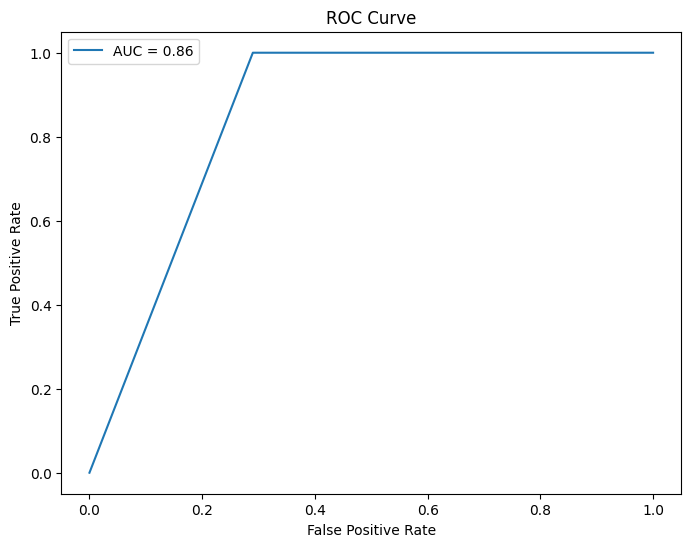

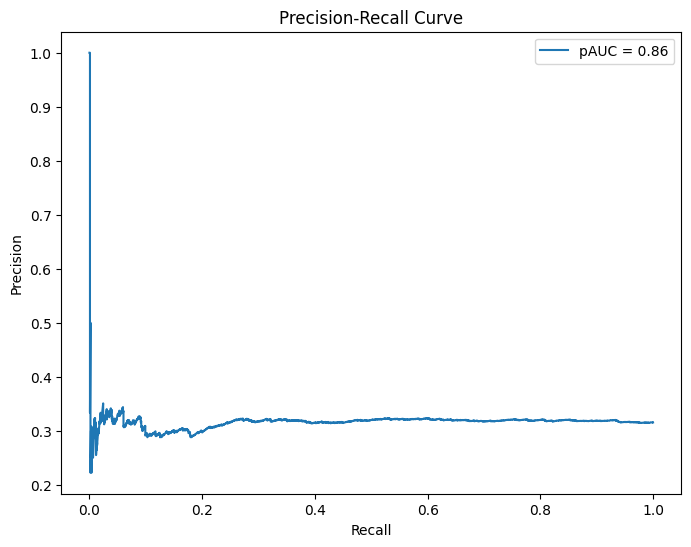

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, mse_t)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'pAUC = {pAUC:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()